In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from matplotlib import rcParams

%matplotlib inline

In [88]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,7

In [89]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
linreg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors = 5)
knn_w = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')

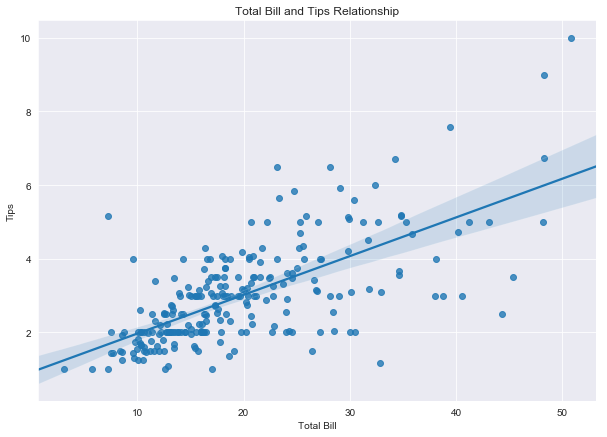

In [133]:
X = df['total_bill'] 
y = df['tip']

sns.regplot(X,y)
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.title('Total Bill and Tips Relationship')
plt.show()

In [92]:
X = X.to_frame()
y = y.to_frame()

In [132]:
linreg.fit(X, y)
print(' linreg score as is:', linreg.score(X,y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
linreg.fit(X_train, y_train)
print('coeficient:', linreg.coef_)
print('intercept:', linreg.intercept_)
print('score with 30% holdout:', linreg.score(X_test, y_test))

print('cross val score, K-folds=5:', cross_val_score(linreg, X, y, cv=5).mean())

 linreg score as is: 0.45661658635167657

coeficient: [[0.10692279]]
intercept: [0.82737113]
score with 30% holdout: 0.38935786550317053
cross val score, K-folds = 5: 0.45654423588476317


In [130]:
knn.fit(X, y)
print('knn score with k=5:', knn.score(X, y))

knn score with k=5: 0.4319121685507562


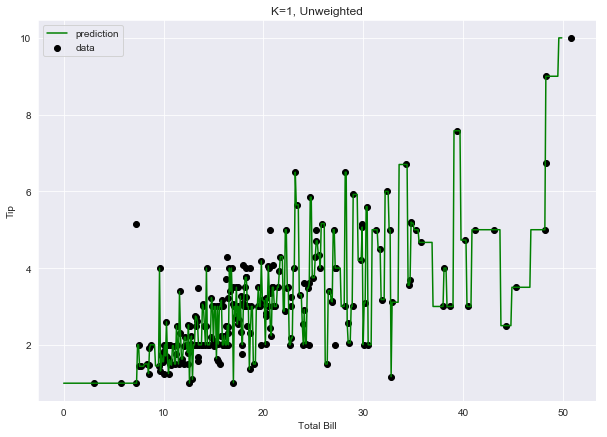

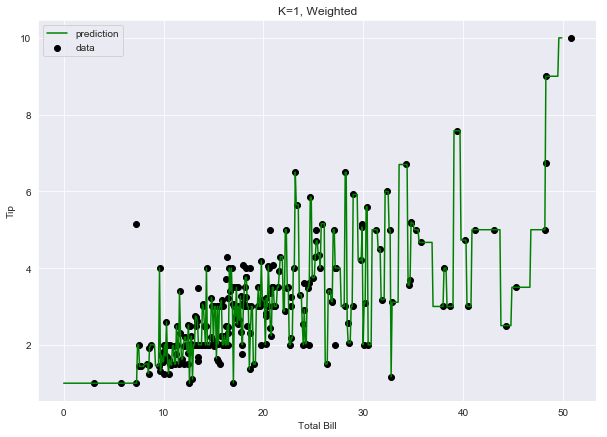

Unweighted Accuracy: 0.02, std: (+/-0.24)
Weighted Accuracy: 0.02, std: (+/- 0.24)




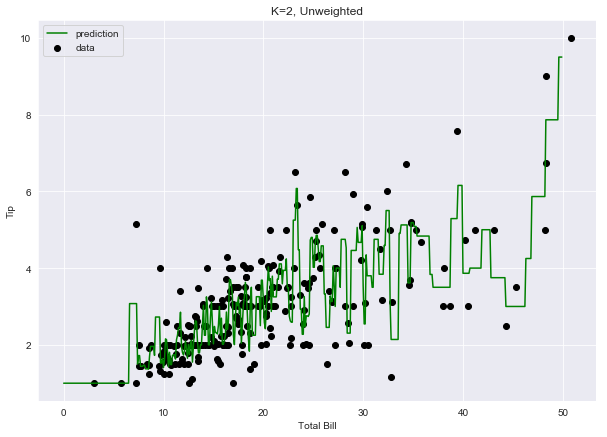

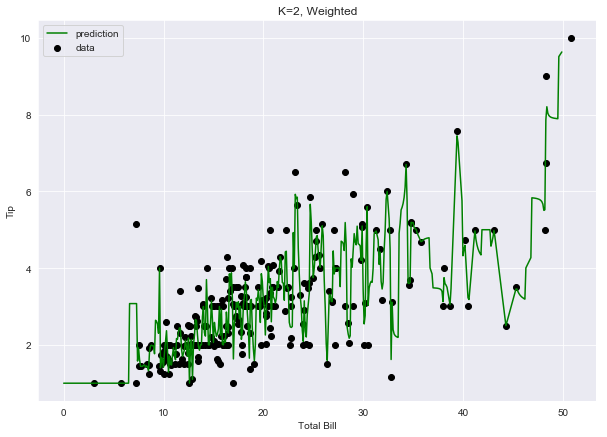

Unweighted Accuracy: 0.16, std: (+/-0.29)
Weighted Accuracy: 0.10, std: (+/- 0.16)




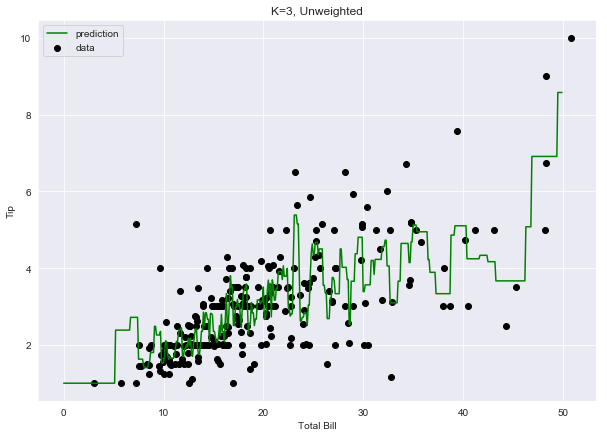

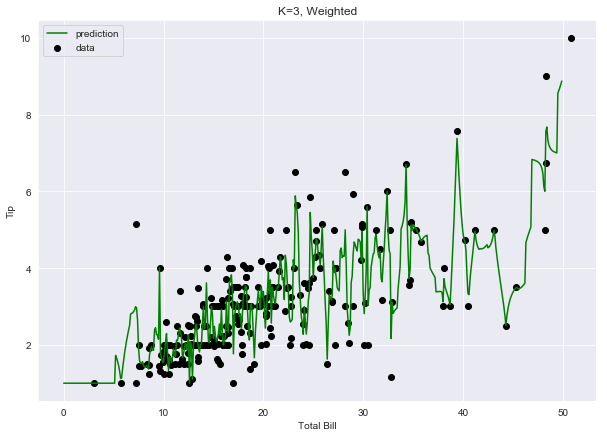

Unweighted Accuracy: 0.26, std: (+/-0.37)
Weighted Accuracy: 0.17, std: (+/- 0.27)




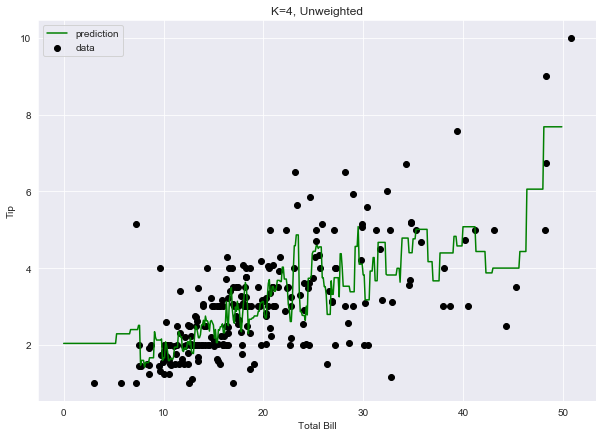

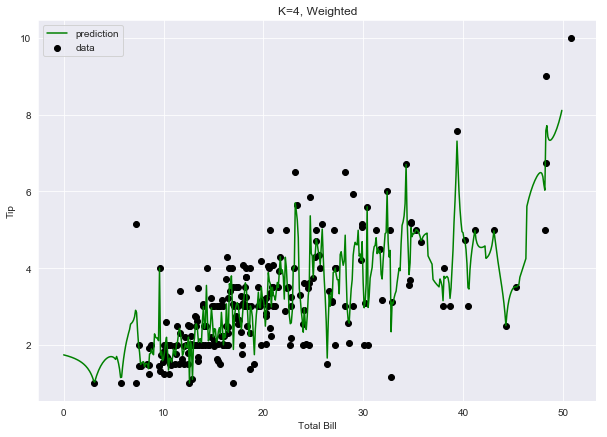

Unweighted Accuracy: 0.31, std: (+/-0.39)
Weighted Accuracy: 0.20, std: (+/- 0.29)




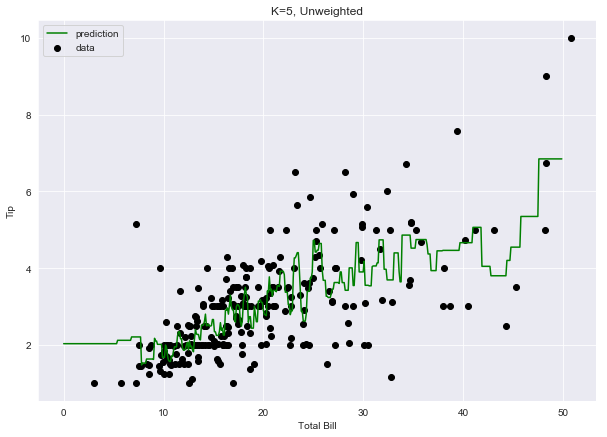

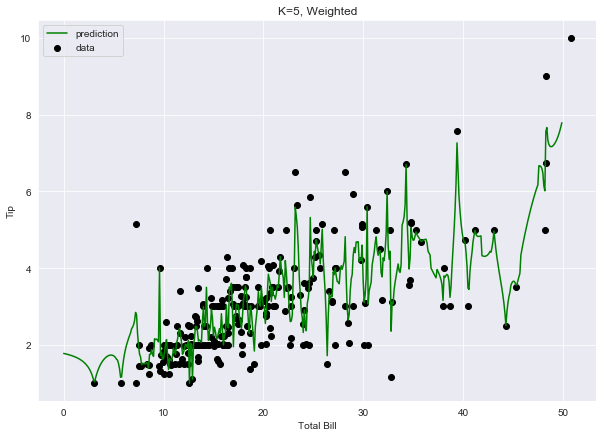

Unweighted Accuracy: 0.33, std: (+/-0.36)
Weighted Accuracy: 0.22, std: (+/- 0.30)




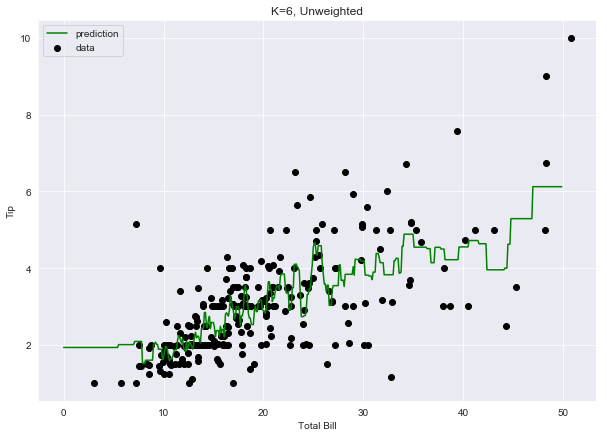

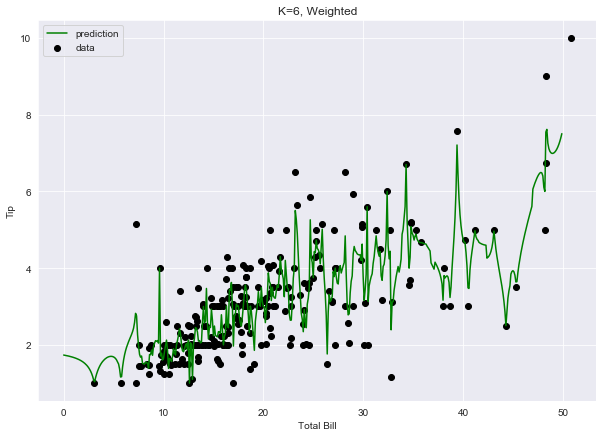

Unweighted Accuracy: 0.37, std: (+/-0.30)
Weighted Accuracy: 0.24, std: (+/- 0.29)




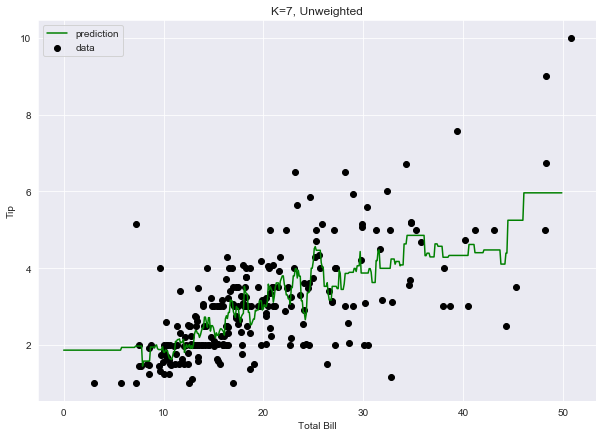

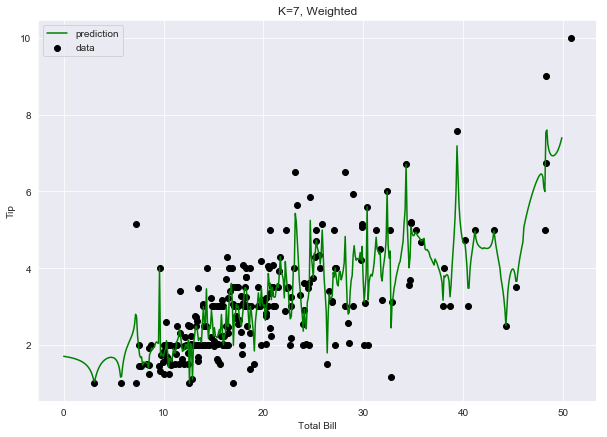

Unweighted Accuracy: 0.34, std: (+/-0.27)
Weighted Accuracy: 0.24, std: (+/- 0.29)




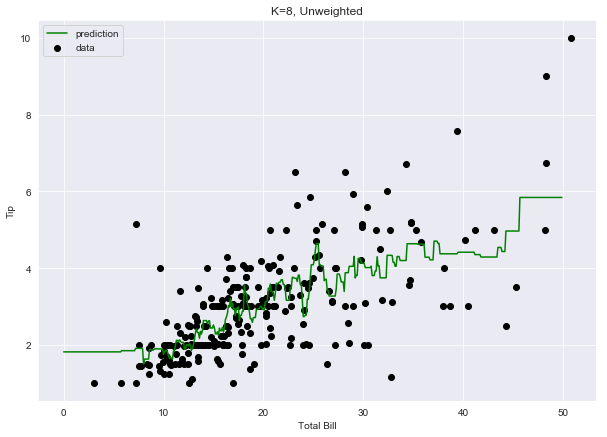

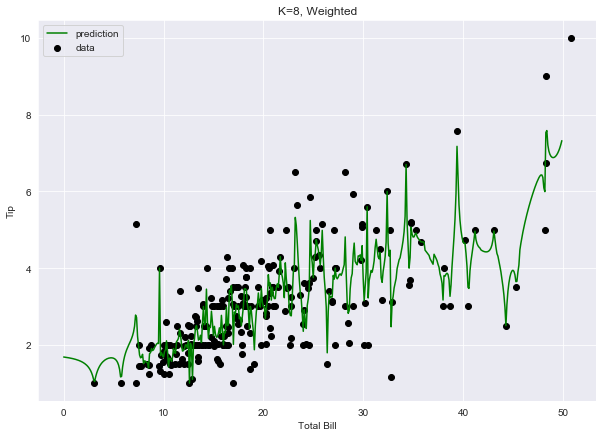

Unweighted Accuracy: 0.34, std: (+/-0.26)
Weighted Accuracy: 0.25, std: (+/- 0.29)




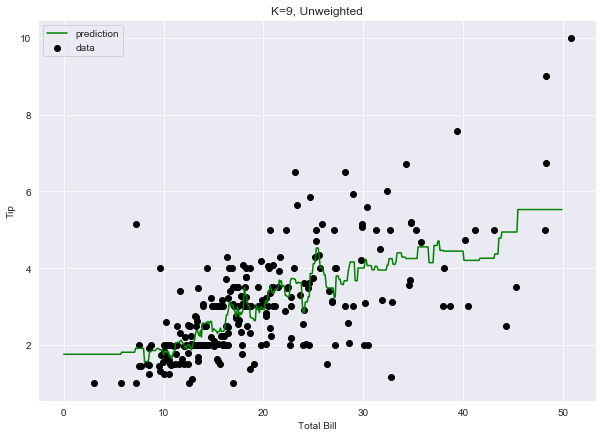

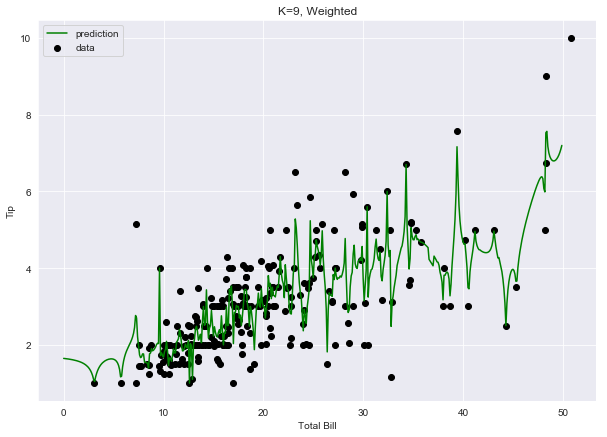

Unweighted Accuracy: 0.36, std: (+/-0.27)
Weighted Accuracy: 0.25, std: (+/- 0.29)




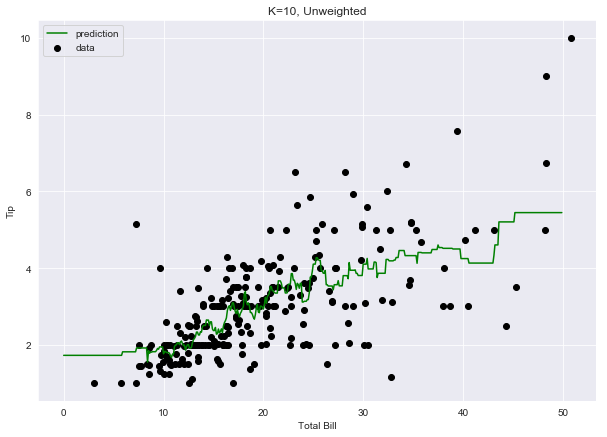

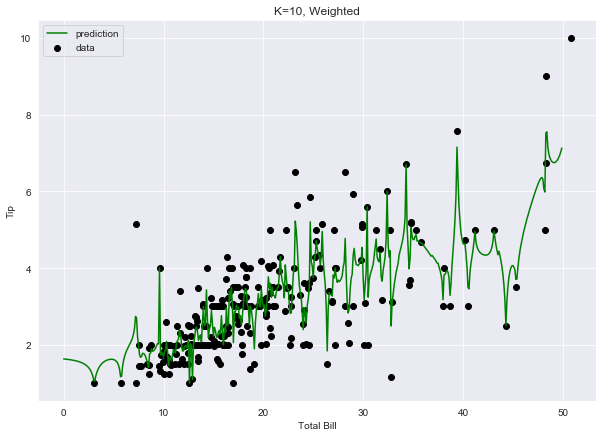

Unweighted Accuracy: 0.36, std: (+/-0.27)
Weighted Accuracy: 0.26, std: (+/- 0.29)




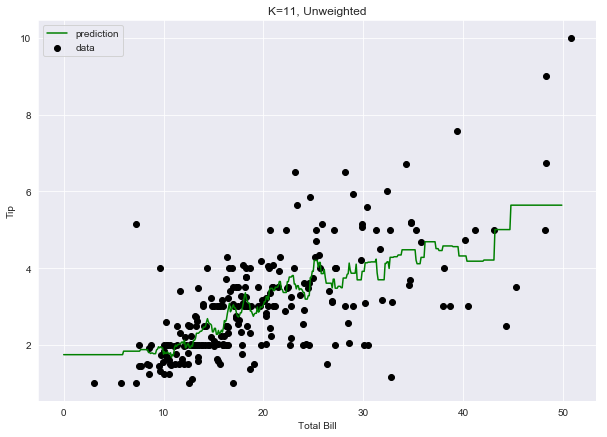

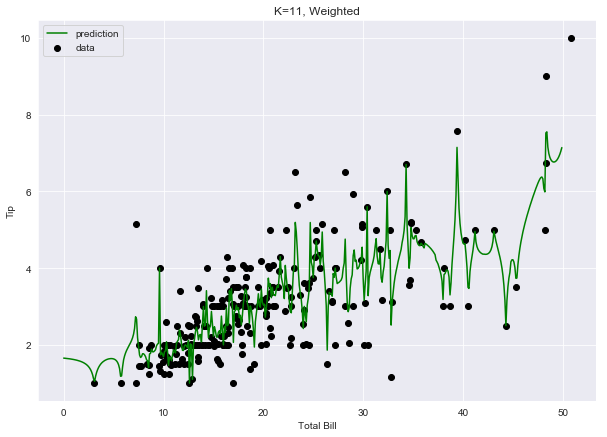

Unweighted Accuracy: 0.35, std: (+/-0.24)
Weighted Accuracy: 0.26, std: (+/- 0.29)




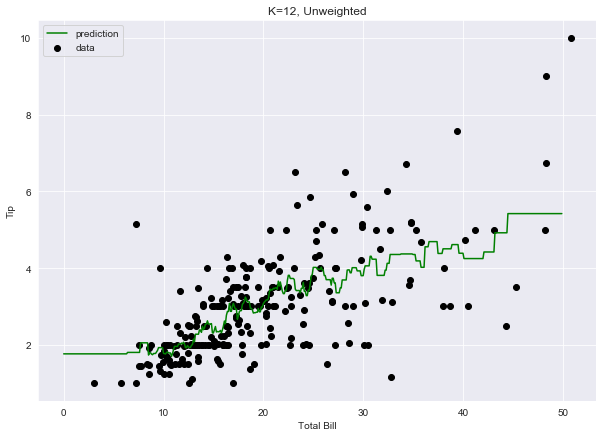

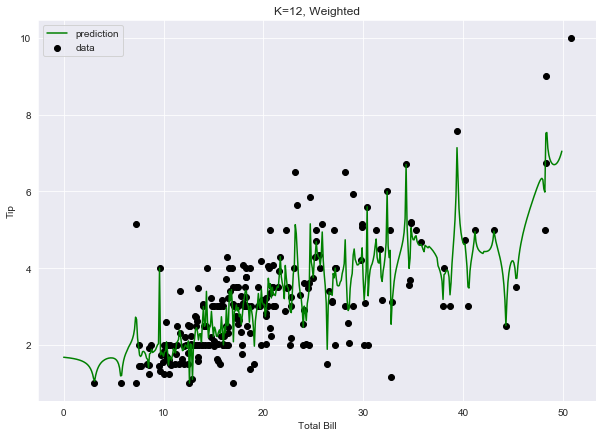

Unweighted Accuracy: 0.35, std: (+/-0.26)
Weighted Accuracy: 0.26, std: (+/- 0.29)




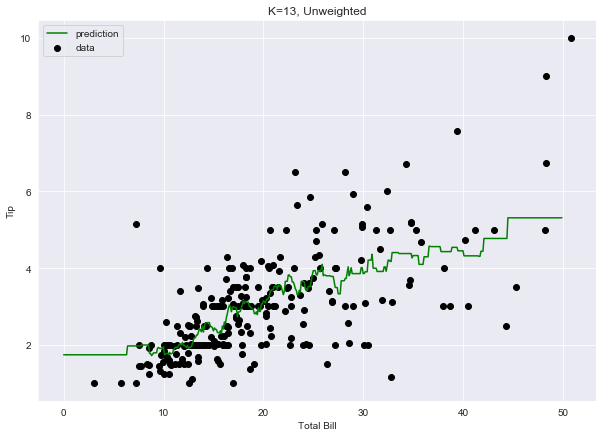

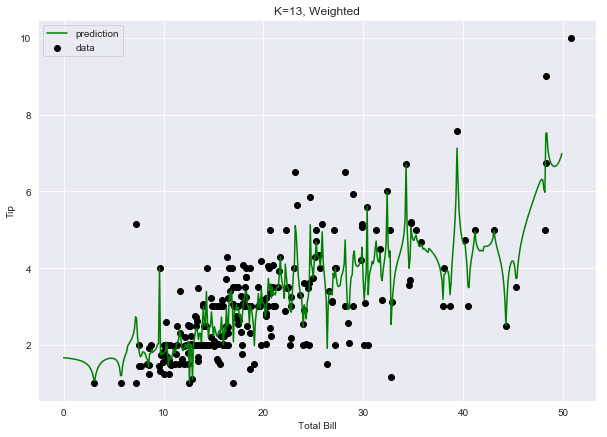

Unweighted Accuracy: 0.36, std: (+/-0.27)
Weighted Accuracy: 0.27, std: (+/- 0.29)




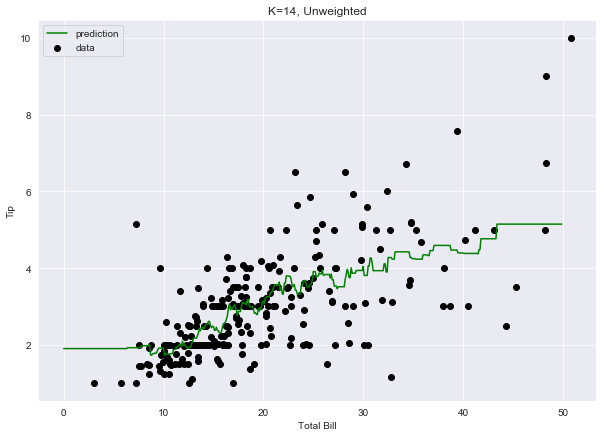

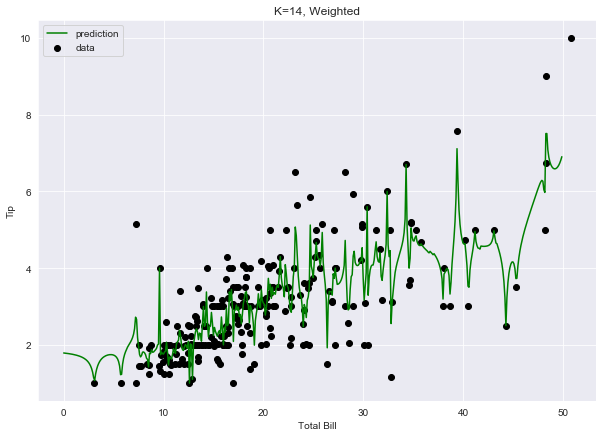

Unweighted Accuracy: 0.36, std: (+/-0.26)
Weighted Accuracy: 0.27, std: (+/- 0.29)




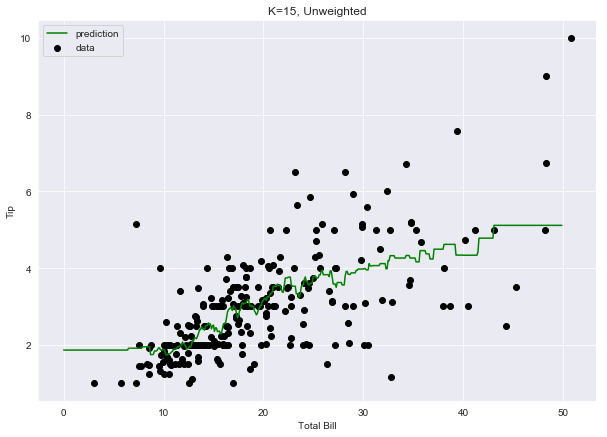

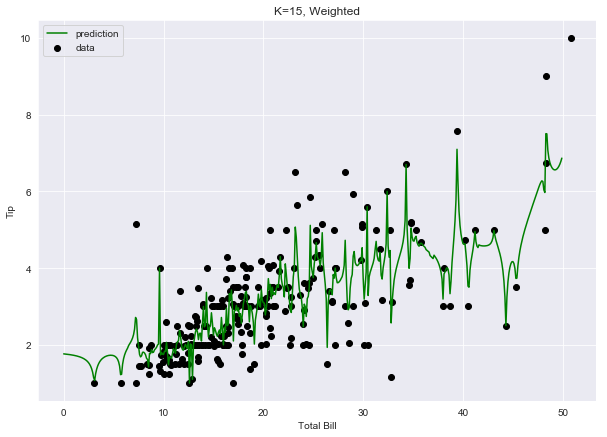

Unweighted Accuracy: 0.37, std: (+/-0.27)
Weighted Accuracy: 0.27, std: (+/- 0.29)




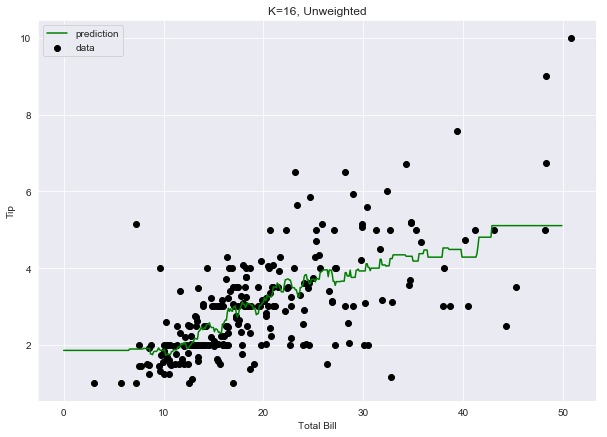

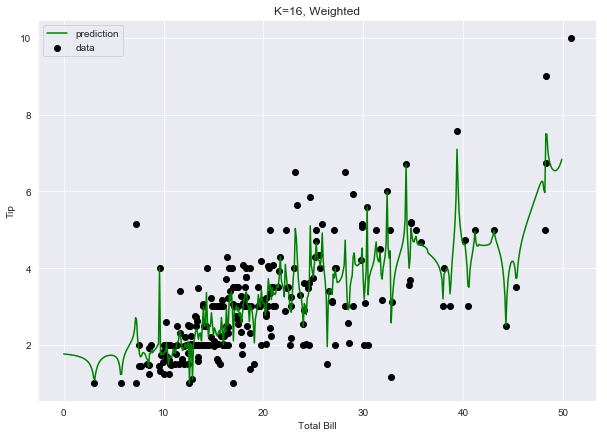

Unweighted Accuracy: 0.38, std: (+/-0.29)
Weighted Accuracy: 0.28, std: (+/- 0.30)




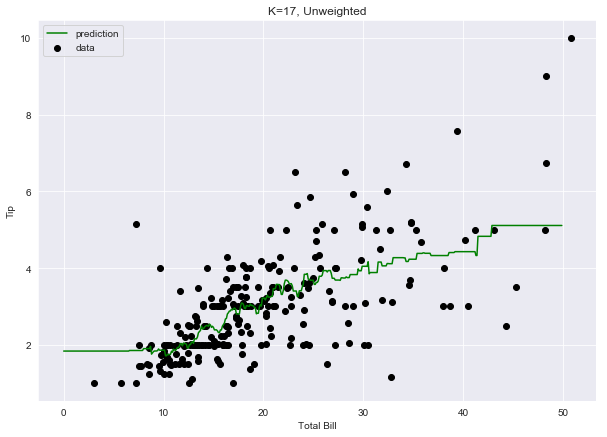

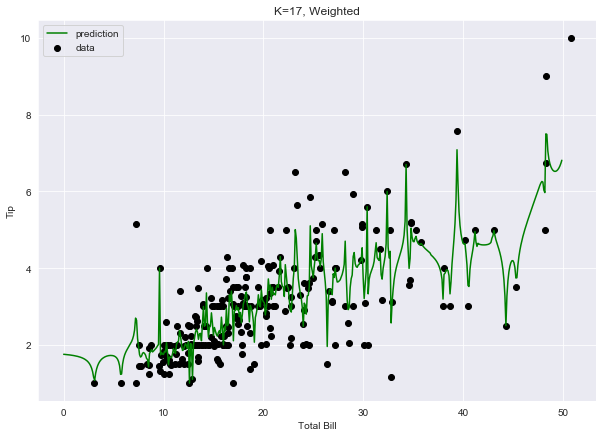

Unweighted Accuracy: 0.39, std: (+/-0.28)
Weighted Accuracy: 0.28, std: (+/- 0.30)




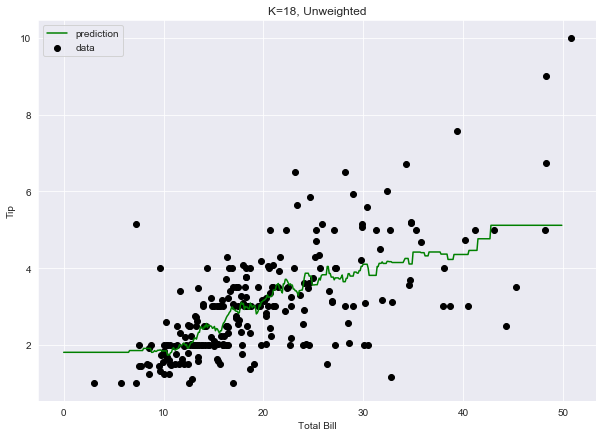

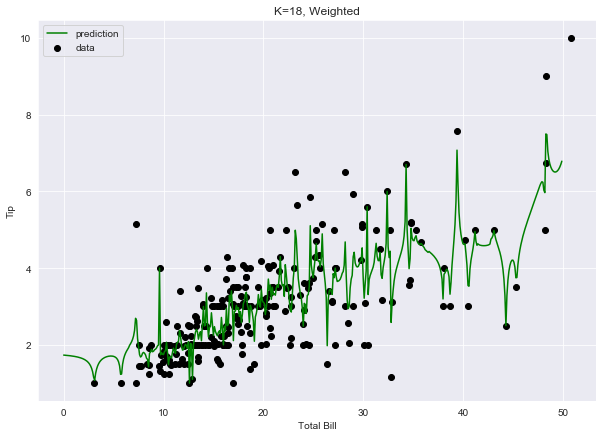

Unweighted Accuracy: 0.39, std: (+/-0.27)
Weighted Accuracy: 0.29, std: (+/- 0.30)




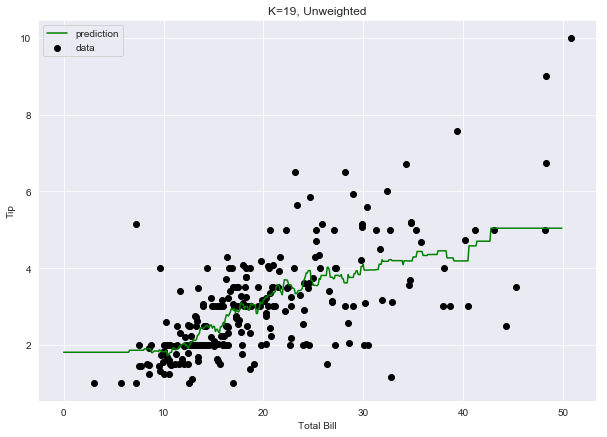

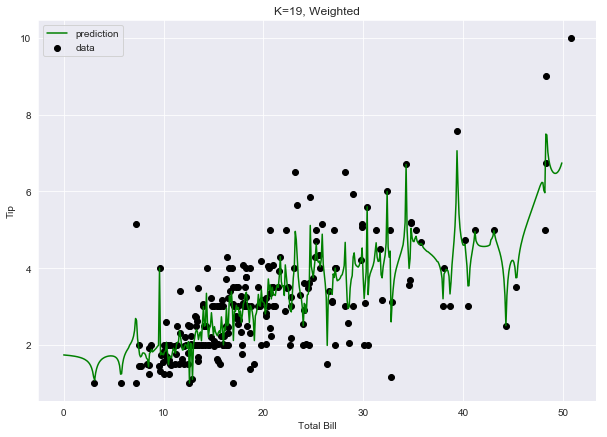

Unweighted Accuracy: 0.40, std: (+/-0.27)
Weighted Accuracy: 0.29, std: (+/- 0.30)




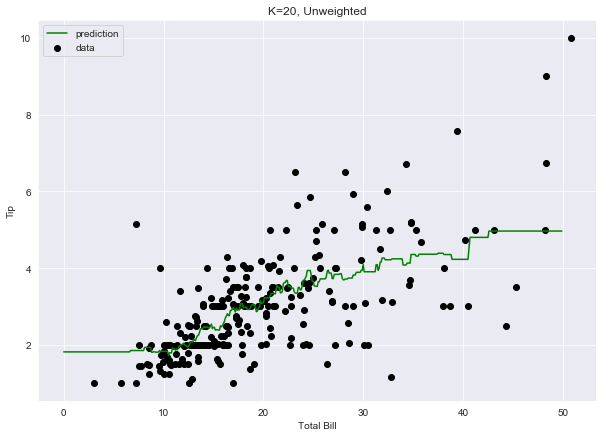

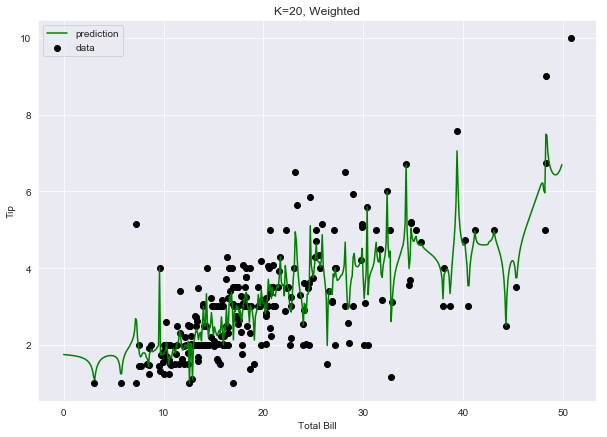

Unweighted Accuracy: 0.41, std: (+/-0.26)
Weighted Accuracy: 0.29, std: (+/- 0.30)




In [127]:
for i in range(1,21):
    # Build our model.
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X, y)

    # Set up our prediction line.
    T = np.arange(0, 50, 0.1)[:, np.newaxis]

    # Trailing underscores are a common convention for a prediction.
    Y_ = knn.predict(T)

    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, Y_, c='g', label='prediction')
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.legend()
    plt.title('K={}, Unweighted'.format(i))
    plt.show()
    
    # Run the same model, this time with weights
    knn_w = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_w.fit(X, y)

    # Set up our prediction line
    T = np.arange(0, 50, 0.1)[:, np.newaxis] # tell me about this syntax

    Y_ = knn_w.predict(T)

    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, Y_, c='g', label='prediction')
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.legend()
    plt.title('K={}, Weighted'.format(i))
    plt.show()
    
    score = cross_val_score(knn, X, y, cv=5)
    print('Unweighted Accuracy: %0.2f, std: (+/-%0.2f)' % (score.mean(), score.std() *2))
    score_w = cross_val_score(knn_w, X, y, cv=5)
    print('Weighted Accuracy: %0.2f, std: (+/- %0.2f)' % (score_w.mean(), score_w.std() * 2))
    
    print()
    print()

Based off the of the accuracy scores of these two models it appears that Linear Regression performs better overall. From looking at the visualizations and my understand of OLS regression and KNN regression, My hypthesis is that there are some observations that become further apart as the values of x and y increase. The overall dataset is heteroscedastic. When using the KNN, the closest observations become further apart as x increases and becomes less reliable. Linear Regression, while not producing a score greater than .45.